<a href="https://colab.research.google.com/github/LucianoMO101/pytorch-convolutional-neural-network/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uitleg over Tensor en Numpy


##Tensor match

In [182]:
import torch

my_torch = torch.arange(10)
my_torch

# Reshape and View
my_torch = my_torch.reshape(2,5)
my_torch

# Reshape if we don't know the number of items using -1
my_torch2 = torch.arange(10)
my_torch2

my_torch2 = my_torch2.reshape(-1, 5)
my_torch2

my_torch3 = torch.arange(10)
my_torch3

my_torch4 = my_torch3.view(2,5)
my_torch4

# with reshape and view, they will update
my_torch5 = torch.arange(10)
my_torch5

my_torch6 = my_torch5.reshape(2,5)
my_torch6

my_torch5[1] = 4141
my_torch5

my_torch6

# Slices
my_torch7 = torch.arange(10)
my_torch7

# Grab a specific item
my_torch7[7]

# Grab slice
my_torch8 = my_torch7.reshape(5,2)
my_torch8

my_torch8[:,1]

# Return column
my_torch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

In [183]:
# Grab a specific item
my_torch7[7]

tensor(7)

In [184]:
# Grab slice
my_torch8 = my_torch7.reshape(5,2)
my_torch8

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [185]:
my_torch8[:,1]

tensor([1, 3, 5, 7, 9])

In [186]:
# Return column
my_torch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

##Tensor Match

In [187]:
import torch
import numpy as np


In [188]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [189]:
# Addition
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [190]:
# Addition in longhand
torch.add(tensor_a, tensor_b)

tensor([ 6,  8, 10, 12])

In [191]:
# Substraction
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [192]:
# Sub function
torch.sub(tensor_b, tensor_a)

tensor([4, 4, 4, 4])

In [193]:
# Multiplication
tensor_a * tensor_b

#Is hetzelfde als dit
torch.mul(tensor_a, tensor_b)

tensor([ 5, 12, 21, 32])

In [194]:
# Division (eindigt als float met decimals)
tensor_b / tensor_a

# Is hetzelfde als dit
torch.div(tensor_b, tensor_a)

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [195]:
# Remainder Modules
tensor_b % tensor_a

#Zo kan het ook
torch.remainder(tensor_b, tensor_a)

tensor([0, 0, 1, 0])

In [196]:
# Exponents / power
tensor_a ** tensor_b

#Zo kan het ook
torch.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

In [197]:
#tensor_a = tensor_a + tensor_b

#Maar het kan ook zo
tensor_a.add_(tensor_b)
tensor_a

tensor([ 6,  8, 10, 12])

##List and Numpy Arrays

In [198]:
my_list_one_dimension = [1,2,3,4,5]
my_list_multi_dimensional = [[1,2,3,4,5], [6,7,8,9,10]]

my_list_one_dimension
my_list_multi_dimensional

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

In [199]:
np1 = np.random.rand(3,4)
np1

array([[0.13457397, 0.91738952, 0.95899506, 0.16891639],
       [0.39838318, 0.63818771, 0.81002333, 0.64696154],
       [0.37328539, 0.50071153, 0.483781  , 0.71444025]])

In [200]:
np1.dtype

dtype('float64')

## Tensors


In [201]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[ 0.0497,  1.3445,  1.4042,  0.6526],
        [-1.1216,  0.9973, -0.0545,  0.9863],
        [-1.3325, -1.1482,  0.2566,  1.2768]])

In [202]:
tensor_3d = torch.zeros(2,3,4)
tensor_3d

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [203]:
## Create tensor out of numpy array
my_tensor = torch.tensor(np1)
my_tensor

tensor([[0.1346, 0.9174, 0.9590, 0.1689],
        [0.3984, 0.6382, 0.8100, 0.6470],
        [0.3733, 0.5007, 0.4838, 0.7144]], dtype=torch.float64)

#Convolutional Neural Network


In [204]:
# ==========================================
# CONVOLUTIONAL NEURAL NETWORK (CNN) MET MNIST DATASET
# ==========================================
# In deze code bouwen we een CNN om handgeschreven cijfers (0–9) te herkennen
# met behulp van de MNIST dataset.
# Elke stap is voorzien van Nederlandstalige uitleg om inzicht te geven in wat er gebeurt.

# ------------------------------
# 1. Importeren van de nodige pakketten
# ------------------------------

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

# Extra pakketten voor analyse en visualisatie
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
# Hiermee worden plots direct in de notebook getoond

##H2. Data Voorbereiding

In [205]:
# We gebruiken de MNIST dataset (handgeschreven cijfers)
# Elke afbeelding is 28x28 pixels en zwart-wit (1 kleurkanaal)
# transforms.ToTensor() zet afbeeldingen om naar tensoren (PyTorch’s datatype voor numerieke berekeningen)
transform = transforms.ToTensor()

In [206]:
# Download en laad de trainingsdata
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [207]:
# Download en laad de testdata
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [208]:
# Deze regel toont informatie over de train dataset (alleen om te testen)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [209]:
# Deze regel toont informatie over de train dataset (alleen om te testen)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

## H3. DataLoader Aanmaken

In [210]:
# De DataLoader verdeelt de dataset in kleine batches.
# batch_size bepaalt hoeveel afbeeldingen tegelijk aan het model worden gevoerd.
# shuffle=True zorgt dat de volgorde willekeurig wordt, wat training robuuster maakt.
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

##H4. Eerste test met convolutionele lagen

In [211]:
# Een convolutionele laag scant de afbeelding met filters (ook wel kernels genoemd)
# en leert belangrijke kenmerken (randen, vormen, patronen).
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

##5. Test één afbeelding door de lagen (om te begrijpen wat er gebeurt)

In [212]:
# Pak de eerste afbeelding uit de dataset
for i, (X_train, y_train) in enumerate(train_data):
  break

In [213]:
# (1, 28, 28) → 1 kanaal, 28x28 pixels
X_train.shape

torch.Size([1, 28, 28])

In [214]:
# Reshape zodat PyTorch het als batch kan verwerken (batch_size, channels, height, width)
x = X_train.view(1,1,28,28)

In [215]:
# Eerste convolutie + activatiefunctie (ReLU = maakt negatieve waarden 0)
#relu staat voor Rectified Linear Unit
x = F.relu(conv1(x)) # Rectified Linear Unit voor onze activation function

In [216]:
# De 1 is voor een single image, de 6 is voor de filters waar we om vroegen
#26x26 is de image

# Verwacht: torch.Size([1, 6, 26, 26])
x.shape

torch.Size([1, 6, 26, 26])

In [217]:
# Gaat langs de pooling layer
# Poolinglaag reduceert resolutie → verkleint data maar behoudt belangrijke info
x = F.max_pool2d(x, 2, 2) # kernal of 2 and stride of 2

In [218]:
# Verwacht: torch.Size([1, 6, 26, 26])
x.shape #26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [219]:
x = F.relu(conv2(x))
# Tweede convolutielaag

In [220]:
# We hebben opnieuw geen padding vastgelegd dus hierdoor verliezen we 2 pixels langs de rand van de image
x.shape # resultaat moet zijn torch.Size([1, 16, 11, 11])

torch.Size([1, 16, 11, 11])

In [221]:
# Nog een poolinglaag
x = F.max_pool2d(x,2,2)

In [222]:
# 11 / 2 = 5.5 but we have to round down, because you can't invent data to round up
# 11 / 2 = 5.5 maar we het moeten afronden bij het kleinste getal want we kunnen geen data verzinnen die het op zouden moeten vullen.
x.shape # resultaat moet zijn torch.Size([1, 16, 5, 5])

torch.Size([1, 16, 5, 5])

##H6. CNN Modelklasse definiëren

In [223]:
# We maken nu een klasse voor het volledige model.
# Deze klasse beschrijft hoe data door het netwerk stroomt.
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    # Convolution layers
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    # Fully Connected layer
    # Deze nemen de output van de convolutielagen en gebruiken die om classificatie te doen.
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) # 10 klassen voor cijfers 0–9

  def forward(self, X):
    # Eerste convolution + pooling
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal en stride 2

    # Tweede convolution + pooling
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernal en stride 2

    # Re-View om het te flatten (maakt tensor 2D zodat deze naar dense layers kan)
    X = X.view(-1, 16*5*5) # negative one zodat we de the batch size kunnen variëren

    # Fully Connected layer + activaties
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    # Log-Softmax geeft waarschijnlijkheidsverdeling over 10 klassen
    return F.log_softmax(X, dim=1)

##H7. Model aanmaken

In [224]:
# Creëer een Instance van de Model
torch.manual_seed(41) # Voor reproduceerbare resultaten
model = ConvolutionalNetwork()
model # Laat modelstructuur zien (om te testen)

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

##H8. Lossfunctie en optimizer

In [225]:
# Loss Function Optimizer
# CrossEntropyLoss vergelijkt voorspelling vs. echte labels
# Adam is een optimizer die de gewichten aanpast tijdens training.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # The smaller the Learning Rate, the longer its gonna take to train.

##H9. Model trainen

In [169]:
import time
start_time = time.time()

#Creëer Variables om dingen te tracken
epochs = 5 # Aantal keer dat het model door de volledige dataset gaat
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop van Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # ----- TRAINING FASE -----
  for b,(X_train, y_train) in enumerate(train_loader):

    b+=1 # start onze batches met 1
    y_pred = model(X_train) # Dit doen we om voorspellingen te maken met de training set. Niet flattened.

    # Hoe fout zitten we? Vergelijk de predictions met correcte antwoorden in y_train.
    loss = criterion(y_pred, y_train) # Bereken verlies

    # Aantal correcte voorspellingen in deze batch
    predicted = torch.max(y_pred.data, 1)[1] # Voeg het number toe van de correcte prediction. Indexed van de eerst point
    batch_correct = (predicted == y_train).sum() # Checken hoeveel we correct hebben van deze batch. True = 1, False = 0, sum dit
    trn_corr += batch_correct # Blijf checken hoe verder we gaan met de training

    # Backpropagation (update gewichten/parameters)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print voortgang om training te monitoren
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  # Opslaan van statistieken voor latere grafieken
  train_losses.append(loss)
  train_correct.append(trn_corr)

  # ----- TEST FASE -----
  with torch.no_grad(): # Geen gradiënt, dus we werken onze gewichten en biases niet bij met testgegevens.
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Toevoegen van correcte predictions
      tst_corr += (predicted == y_test).sum() # T=1, F=0 en sum

# Verlies en juistheid opslaan
  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

# Trainingstijd berekenen.
current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0  Batch: 600  Loss: 0.1623610556125641
Epoch: 0  Batch: 1200  Loss: 0.1502392590045929
Epoch: 0  Batch: 1800  Loss: 0.4744560718536377
Epoch: 0  Batch: 2400  Loss: 0.14238706231117249
Epoch: 0  Batch: 3000  Loss: 0.007758188061416149
Epoch: 0  Batch: 3600  Loss: 0.3836284875869751
Epoch: 0  Batch: 4200  Loss: 0.0038223876617848873
Epoch: 0  Batch: 4800  Loss: 0.0021286322735249996
Epoch: 0  Batch: 5400  Loss: 0.0569545142352581
Epoch: 0  Batch: 6000  Loss: 0.00038789428072050214
Epoch: 1  Batch: 600  Loss: 0.005851339548826218
Epoch: 1  Batch: 1200  Loss: 0.3855525553226471
Epoch: 1  Batch: 1800  Loss: 0.004819948226213455
Epoch: 1  Batch: 2400  Loss: 0.003216963727027178
Epoch: 1  Batch: 3000  Loss: 0.0332382395863533
Epoch: 1  Batch: 3600  Loss: 0.5372857451438904
Epoch: 1  Batch: 4200  Loss: 0.04561494290828705
Epoch: 1  Batch: 4800  Loss: 0.0007510822033509612
Epoch: 1  Batch: 5400  Loss: 0.0001173773780465126
Epoch: 1  Batch: 6000  Loss: 0.14201366901397705
Epoch: 2  Batch

##H10. Resultaten visualiseren

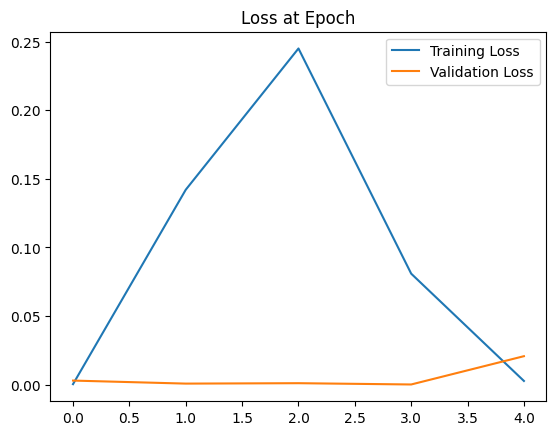

In [170]:
# Graph the loss at epoch
# We bekijken het verlies en de nauwkeurigheid per epoch op een Graph

# Plot verlies
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

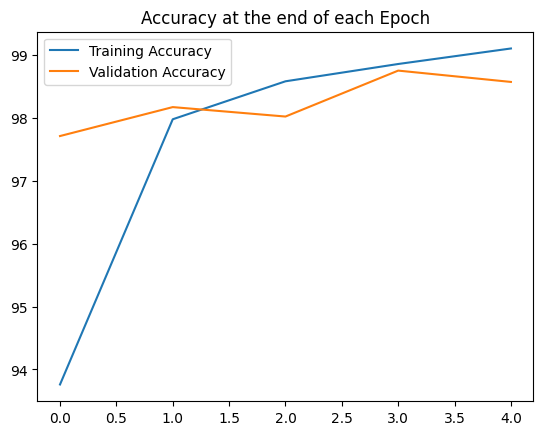

In [171]:
# We willen de nauwkeurigheid van elk epoch het einde weergeven in een graph
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

##H11. Test: modelpresentatie op gehele testset

In [172]:
# We evalueren hoe goed het model presteert op ALLE testafbeeldingen tegelijk.
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [173]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [174]:
# Percentage correcte voorspellingen
correct.item()/len(test_data)*100

98.57000000000001

##H12. Individuele voorspellingen testen

In [175]:
# In dit deel bekijken we één afbeelding en laten het model voorspellen welk cijfer het is.

# Ophalen van afbeelding #4143
test_data[4143] # Tuple: (afbeelding, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [176]:
# Alleen de afbeeldingsdata
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [177]:
# Reshape om visueel te maken
test_data[4143][0].reshape(28, 28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

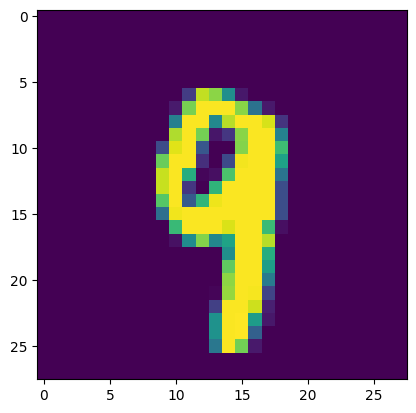

In [178]:
# Toon afbeelding
plt.imshow(test_data[4143][0].reshape(28,28))

In [179]:
# Model in evaluatiemodus zetten
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size van 1 bij 1 color channel, 28x28 groter

In [180]:
# Modeluitvoer (log-waarschijnlijkheden per cijfer)
# Check de nieuwe prediction ... en het krijgen van probabilities
new_prediction

tensor([[-2.1693e+01, -1.8584e+01, -2.1709e+01, -1.5842e+01, -8.6330e+00,
         -1.8415e+01, -3.1769e+01, -1.2734e+01, -1.3396e+01, -1.8273e-04]])

In [181]:
# Hoogste waarschijnlijkheid = voorspelde klasse
# Oftewel, welk getal denkt de CNN te zien en dat staat tussen de haakjes in tensor()!
new_prediction.argmax()

tensor(9)